# Reflection of particles from a cylindrical wall

Let us consider that a particle from the starting position $r_0 = (x_0, y_0)$, in time $\Delta t$, moving with velocity $v = (v_x, v_y)$, crosses the boundary of the circle of radius $R$. We can set, without loss of generality, the time step to be unity $\Delta t = 1$. If it there is no boundary the particle will reach to point $r_e$.

First step in calculating the reflection is to find the point where the particle and the wall touch. If we define this point as $r_T$ ($|r_T| = R$), and the time of impact $T$ we have the following equation:

\begin{equation*}
(x_0 + v_x T)^2 + (y_0 + v_y T)^2 = R^2.
\end{equation*}

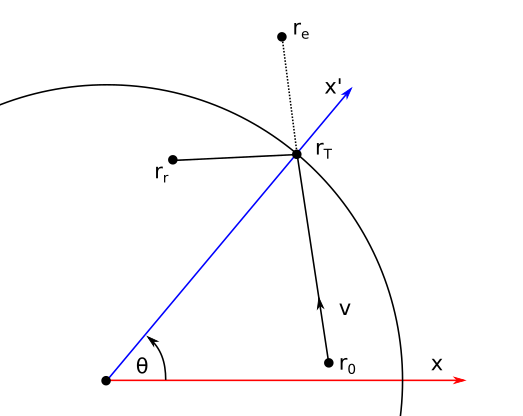

In [1]:
from IPython.display import Image
Image(filename='./cylindrical_reflection.png')

If we solve the quadratic equation for T we get:

$$
\begin{align*}
& (v_x^2 + v_y^2)T^2 + 2(x_0v_x + y_0v_y)T + x_0^2 + y_0^2 - R^2 = 0, \\
\\
& T = \frac{-b + \sqrt{b^2 - 4ac} }{2a}.
\end{align*}
$$

The particle moves from $r_0$ to the point of impact $r_T$, and reflects reaching $r_r$ in $\Delta t = 1$. If the boundary didn't existed, the particle would reach $r_e$.

In order to get the final position under reflection we first rotate the coordinate system so that $r_T = (x_T, y_T)$ in the transformed system is $r'_T = (x'_T, y'_T) = (R, 0)$. The rotation is performed for angle $-\theta$ and the rotation cosine and sine can be expressed as:

$$
\begin{align*}
cos(\theta) &= \frac{x_T}{R} = C, \\
\\
sin(\theta) &= \frac{y_T}{R} = S. \\
\end{align*}
$$

Where the rotation matrices for a negative and positive angle rotations are:

$$
\begin{align*}
\begin{bmatrix} x' \\ y' \end{bmatrix} &= 
\begin{bmatrix} C & S \\ -S & C \end{bmatrix}\cdot\begin{bmatrix} x \\ y \end{bmatrix}
\\ \\
\begin{bmatrix} x \\ y \end{bmatrix} &= 
\begin{bmatrix} C & -S \\ S & C \end{bmatrix}\cdot\begin{bmatrix} x' \\ y' \end{bmatrix}
\end{align*}
$$

#### Calculation of position after reflection

Calculation of $r_r$ is performed on the basis of the position of the final point $r_e$ in the rotated coordinate system $r'_e$. Position of $r_e = r_0 + v$, and the position in the rotated coordinate system is:

$$
\begin{align*}
\begin{bmatrix} x'_e \\ y'_e \end{bmatrix} = 
\begin{bmatrix} C (x_0 + v_x) + S (y_0 + v_y) \\ -S (x_0 + v_x) + C (y_0 + v_y) \end{bmatrix}
\end{align*}
$$

The end position after the reflection in the rotated system is:

$$
\begin{align*}
\begin{bmatrix} x'_r \\ y'_r \end{bmatrix} = \begin{bmatrix} x'_e - R \\ y'_e \end{bmatrix}
\end{align*}
$$

In the original coordinate system we have:

$$
\begin{align*}
\begin{bmatrix} x_r \\ y_r \end{bmatrix} = 
\begin{bmatrix} C x'_r - S y'_r \\ S x'_r + C y'_r \end{bmatrix}
\end{align*}
$$


#### Calculation of velocity after reflection

When we are in the rotated coordinate system the velocity vector after the reflection is easily calculated since it is a simple inversion of the $v'_x$ component.

$$
\begin{align*}
\begin{bmatrix} v'_x \\ v'_y \end{bmatrix}_{\text{after reflection}} = 
\begin{bmatrix} - v'_x \\ v'_y \end{bmatrix}_{\text{before reflection}}
\end{align*}
$$

Which gives the following velocity vector in the original coordinate system:

$$
\begin{align*}
\begin{bmatrix} v_x \\ v_y \end{bmatrix}_{\text{after reflection}} = 
\begin{bmatrix} - C v'_x - S v'_y \\ - S v'_x + C v'_y \end{bmatrix}_{\text{before reflection}}
\end{align*}
$$

#### Check for multiple reflection

At this point we have new location $r_r$ which can be outside the cylindrical boundaries. In this case we repeat the same steps as above. The difference is that we have the initial position at $r_T$, with veloctiy vector after the reflection $v$ and reduced timestep to $\Delta t_{new} = 1 - T$.  